# 🩺 Pridicting Heart Disease by using MachineLearning Models.

Cardiovascular disease prediction aids practitioners in making more accurate health decisions for their patients. Early detection can aid people in making lifestyle changes and, if necessary, ensuring effective medical care

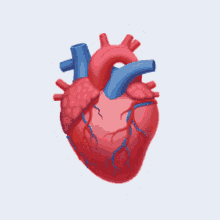


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

###  🔭 Exploring Dataset

In [1]:
#importing necesscary libraries
import pandas as pd #library for operations of dataaframe
import numpy as np  #librar for computution
import matplotlib.pyplot as plt #library for plotting graphs
import seaborn as sns   #library for plotting graphs
import warnings   #library for avoid warnings
warnings.filterwarnings('ignore')

In [2]:
#importing a dataset
df=pd.read_csv(r'heart.csv')
df.head() #displaying top 5 rows of a dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail() #displaying bottom 5 rows of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape #dimensions of the dataset

(303, 14)

Dataset contains 303 rows and 14 columns

In [5]:
df.info() #checking datatypes of a column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Above table shows no null values present in a dataset and it contains 13 integer columns and 1 float column

In [6]:
df.describe().transpose() #staststical description of a given data

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


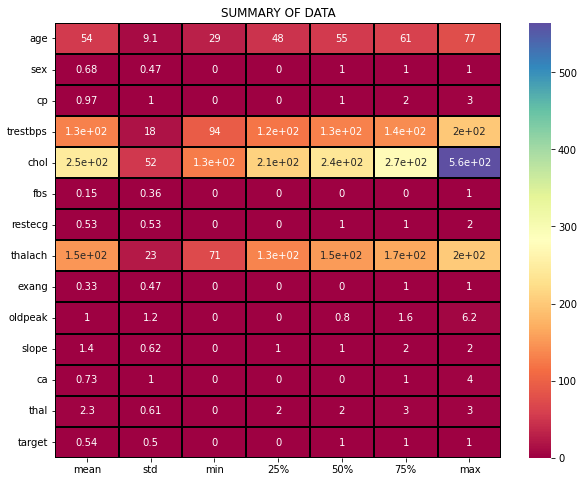

In [7]:
#plotting a description using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="black",
            linewidth=2,cmap=sns.color_palette("Spectral", as_cmap=True))
plt.title("SUMMARY OF DATA")
plt.show()

The visual representaion table shows statistical  description of dataset.we can observe that few columns contains outliers let's treat them in upcoming analysis

# 🔍 Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

##### Understanding columns in Dataset

#### Age:
- Age of person in Years

#### Sex: 
- Male(1),Female(0)

#### Cp: Chest Pain

- Value 0: asymptomatic(Silent (asymptomatic) myocardial ischemia (SMI) is defined as a transient alteration in myocardial perfusion in the absence of chest pain or the usual anginal equivalents.)
- Value 1: atypical angina(Atypical pain is frequently defined as epigastric or back pain or pain that is described as burning, stabbing, or characteristic of indigestion. Typical symptoms usually include chest, arm, or jaw pain described as dull, heavy, tight, or crushing)
- Value 2: non-anginal pain(A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds, it increases with inspiration, can be brought on with one movement of the trunk or arm, can be brought on by local fingers pressure, or bending forward, or it can be relieved immediately on lying down.)
- Value 3: typical angina(Angina  is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. Angina is also called angina pectoris. Angina pain is often described as squeezing, pressure, heaviness, tightness or pain in the chest.) 

#### trestbps:
- The person's resting blood pressure (mm Hg on admission to the hospital) 

#### chol:
- Blood cholesterol is a waxy, fat-like substance made by your liver. Blood cholesterol is essential for good health. Your body needs it to perform important jobs, such as making hormones and digesting fatty foods.The person's cholesterol measurement in mg/dl. 

#### fbs: 
- This measures your blood sugar after an overnight fast (not eating). A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.(> 120 mg/dl, 1 = True; 0 = False)

#### restecg:Resting Electrocardiographic Results
-  Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
-  Value 1: normal
-  Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

#### thalach:
- The person's maximum heart rate achieved. 

#### exang:
- Exercise induced angina Warm-up angina is a common and intriguing phenomenon in which, in subjects with ischemic heart disease, angina induced by initial exercise is attenuated or even disappears if they briefly slacken or interrupt their exertion before resuming it at the same or even greater level of intensity,(1 = yes; 0 = no)

#### oldpeak:
- ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping. 0: downsloping; 1: flat; 2: upsloping. 

#### slope:
- The slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

#### ca: 
- Number of major vessels (0–3) colored by flourosopy,measured in intervals

#### thal:
- Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued.
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

#### target:
- Heart disease (1 = yes, 0= no)


# 🕺 Univariate analysis

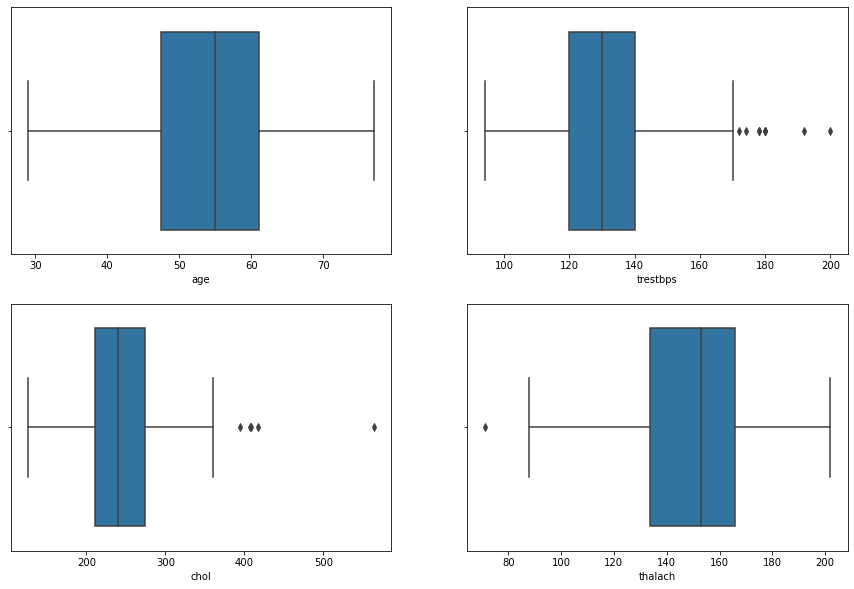

In [8]:
#plotting a box plots to analyze numerical columsn
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='age', data = df, ax=axarr[0][0])
sns.boxplot(x='trestbps',data = df, ax=axarr[0][1]) 
sns.boxplot(x='chol', data = df, ax=axarr[1][0])
sns.boxplot(x='thalach',data = df, ax=axarr[1][1])
plt.show()

#### Inferences
- `Age`: age ranges between 29-80
- `average resting bp` should be <120 but few people have experienced more than 160,but average 130
- `cholestral` or fat stored in blood ranges 150 to 350 but fe people has 0experienced above 400 which is critical health parameter
- `thalach`: we can observe people have achived maximum heart rate of 200/min with average of 155/min,but normal heart rate will be 72 times/min

# 🧑‍🤝‍🧑 Bivariate analysis

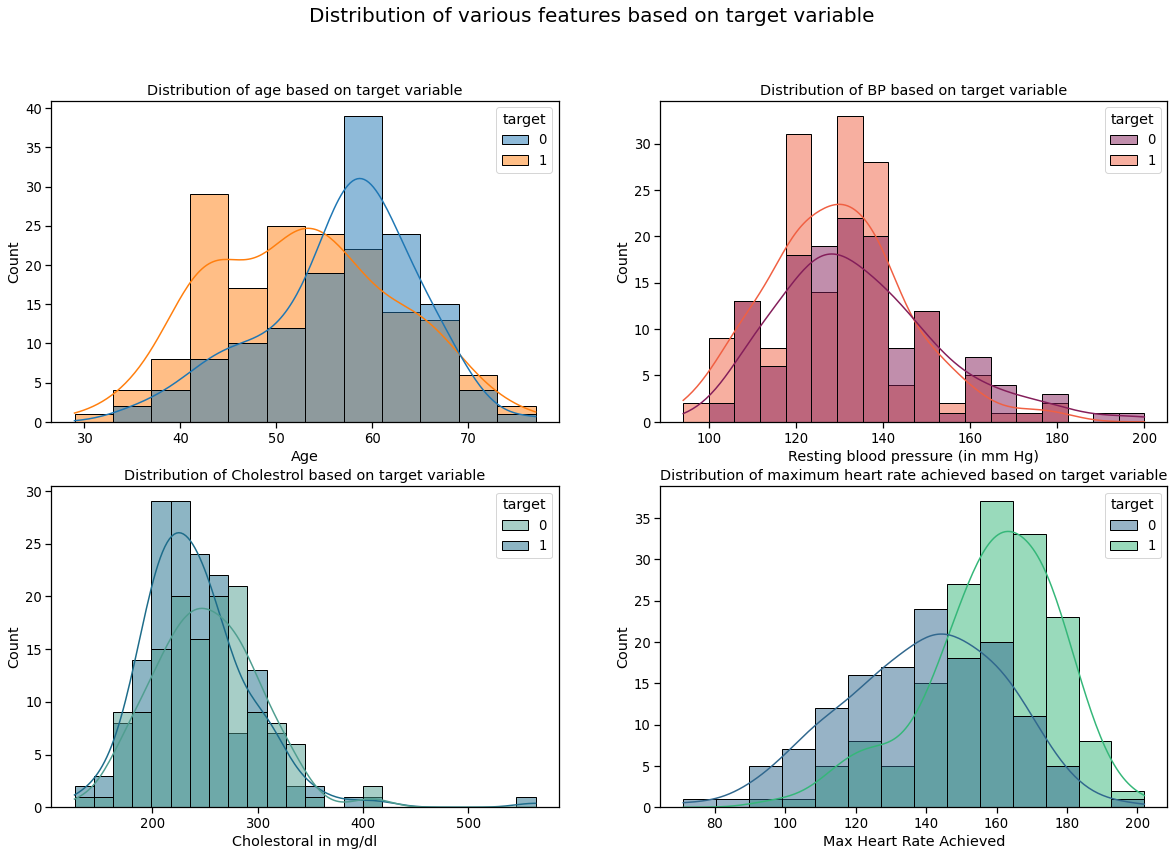

In [9]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'target', kde= True, ax= ax[0, 0], palette='tab10')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trestbps', data= df, hue= 'target', kde= True, ax= ax[0, 1], palette='rocket')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'target', kde= True, ax= ax[1, 0], palette='crest')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalach', data= df, hue= 'target', kde= True, ax= ax[1, 1], palette='viridis')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

<AxesSubplot:xlabel='thal', ylabel='count'>

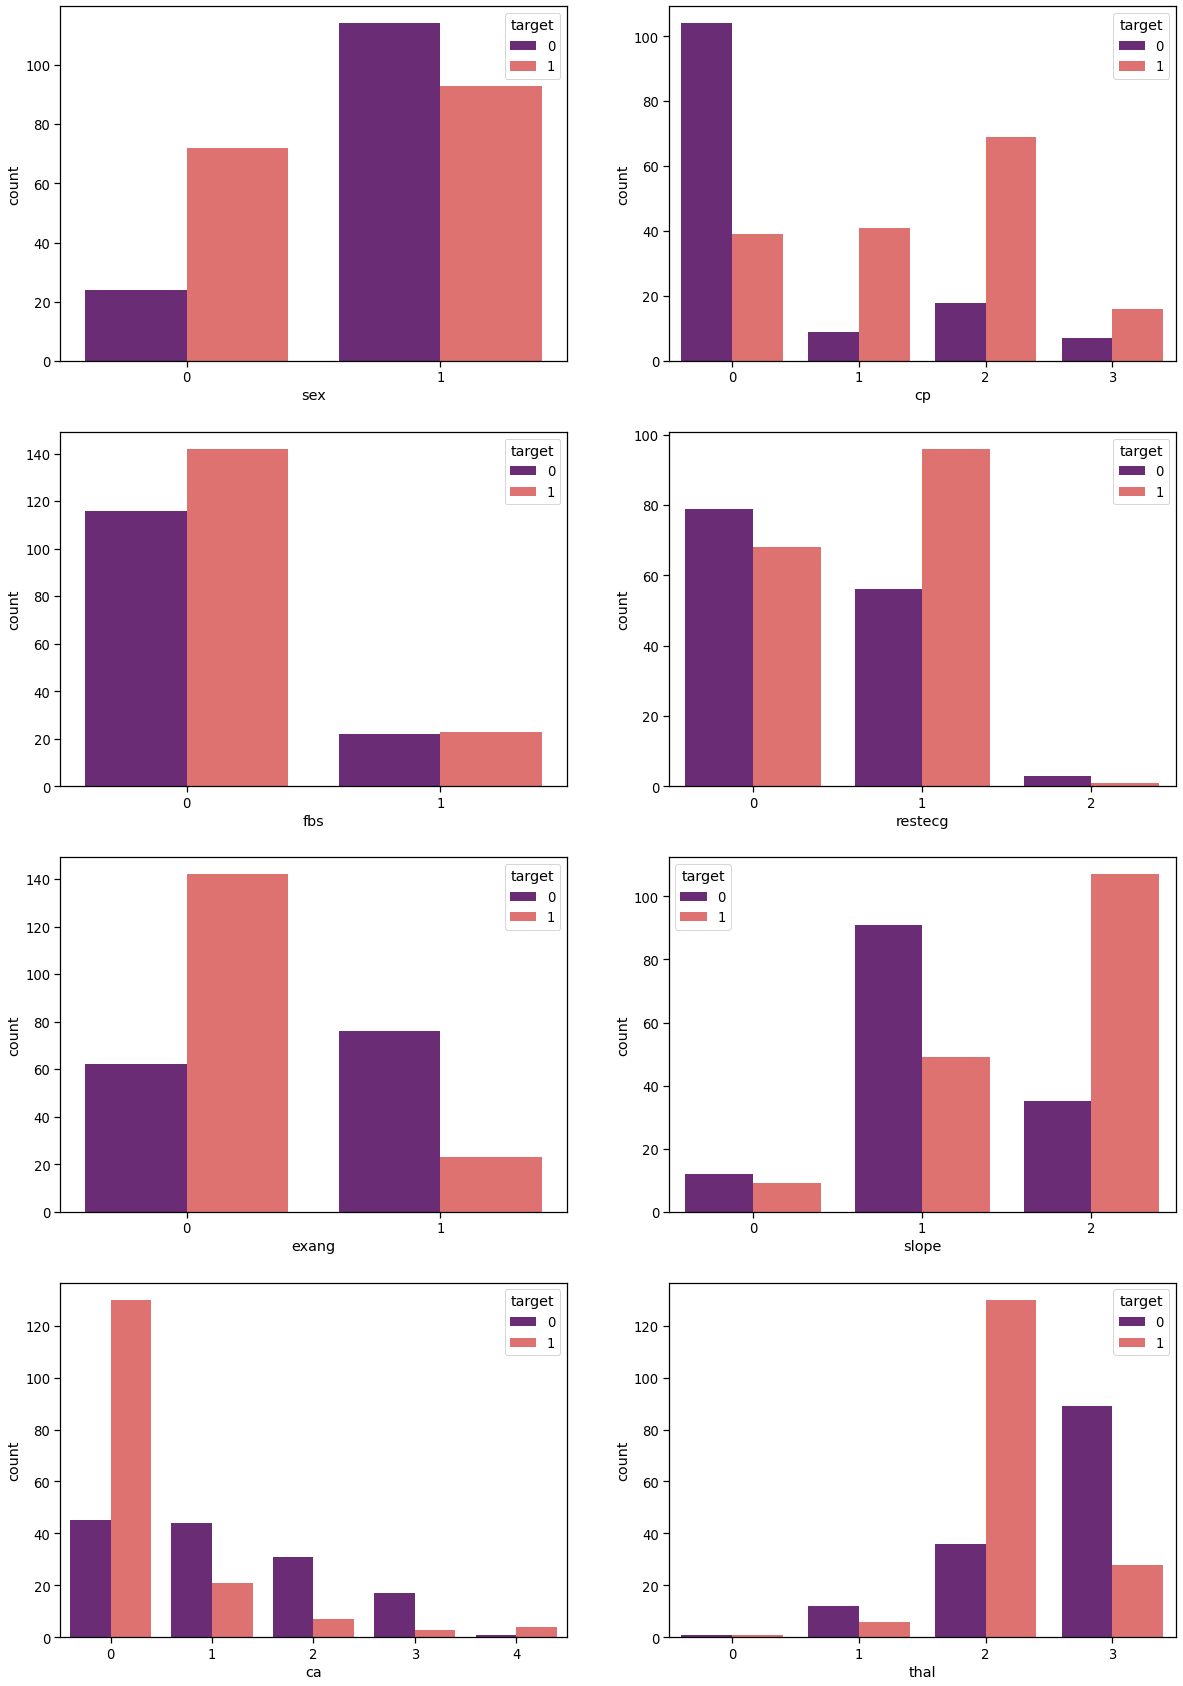

In [10]:
#plotting a count plots with respect to target column
fig, axarr = plt.subplots(4, 2, figsize=(20, 30))
sns.countplot(x='sex', hue = 'target',data = df, ax=axarr[0][0], palette='magma')
sns.countplot(x='cp', hue = 'target',data = df, ax=axarr[0][1], palette='magma') 
sns.countplot(x='fbs', hue = 'target',data = df, ax=axarr[1][0], palette='magma')
sns.countplot(x='restecg', hue = 'target',data = df, ax=axarr[1][1], palette='magma')
sns.countplot(x='exang', hue = 'target',data = df, ax=axarr[2][0], palette='magma')
sns.countplot(x='slope', hue = 'target',data = df, ax=axarr[2][1], palette='magma') 
sns.countplot(x='ca', hue = 'target',data = df, ax=axarr[3][0], palette='magma')
sns.countplot(x='thal', hue = 'target',data = df, ax=axarr[3][1], palette='magma')


Inference:
- women experienced more disease but overall dataset men faced more heart disease
- people who experienced seasonal chest pain or type 2 has more chances of heart diseases,but type 0 has more survival rate
- Fasting blood sugar with less fbs <110 has more chances of heart disease



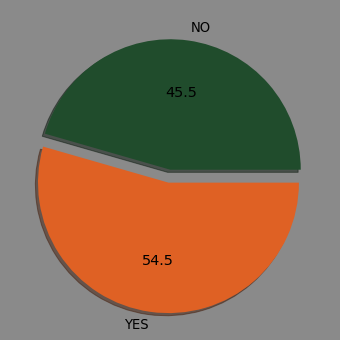

In [11]:
#percentage of target variable
a=df.groupby('target')['target'].count()
a
plt.figure(figsize=(6,6),facecolor='#8a8a8a')
plt.pie(data=df,x=a,labels=['NO','YES'],autopct='%.01f',explode=[0,0.1],shadow=True,center=(0, 0),colors=['#204c2c','#df6124'])
plt.grid()
plt.show()

- Dataset as 54.5% of confirmed and 45% non confirmes which indicates data is not imbalanced

<AxesSubplot:>

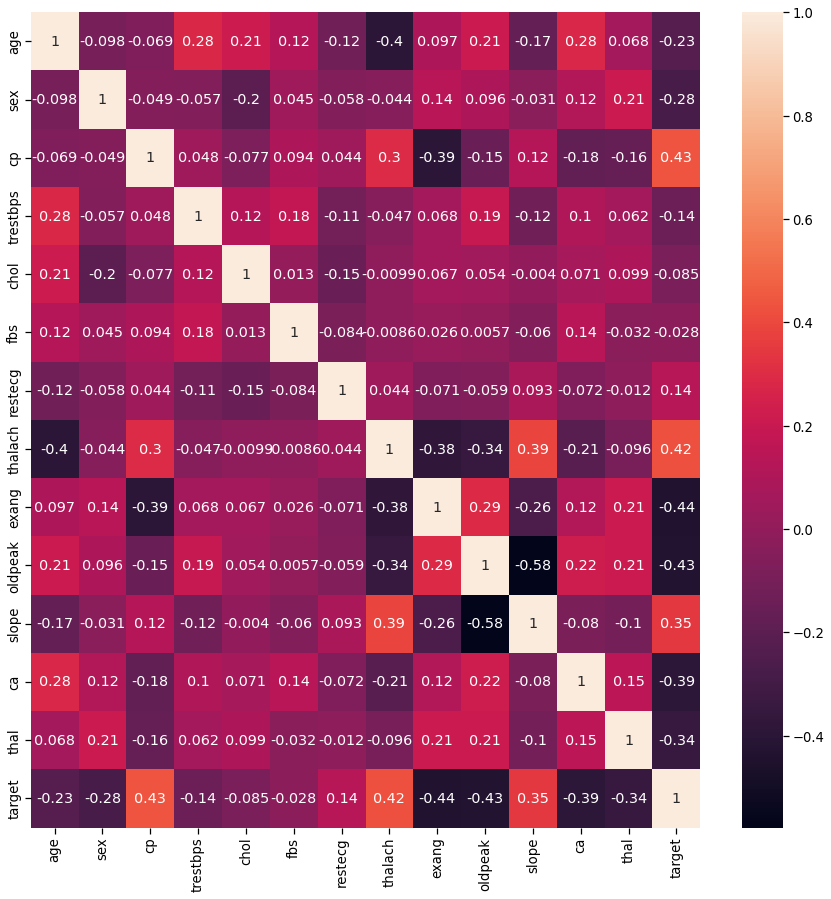

In [12]:
#Heat map for correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

In [13]:
cols= ["#0be05d","#574577"]

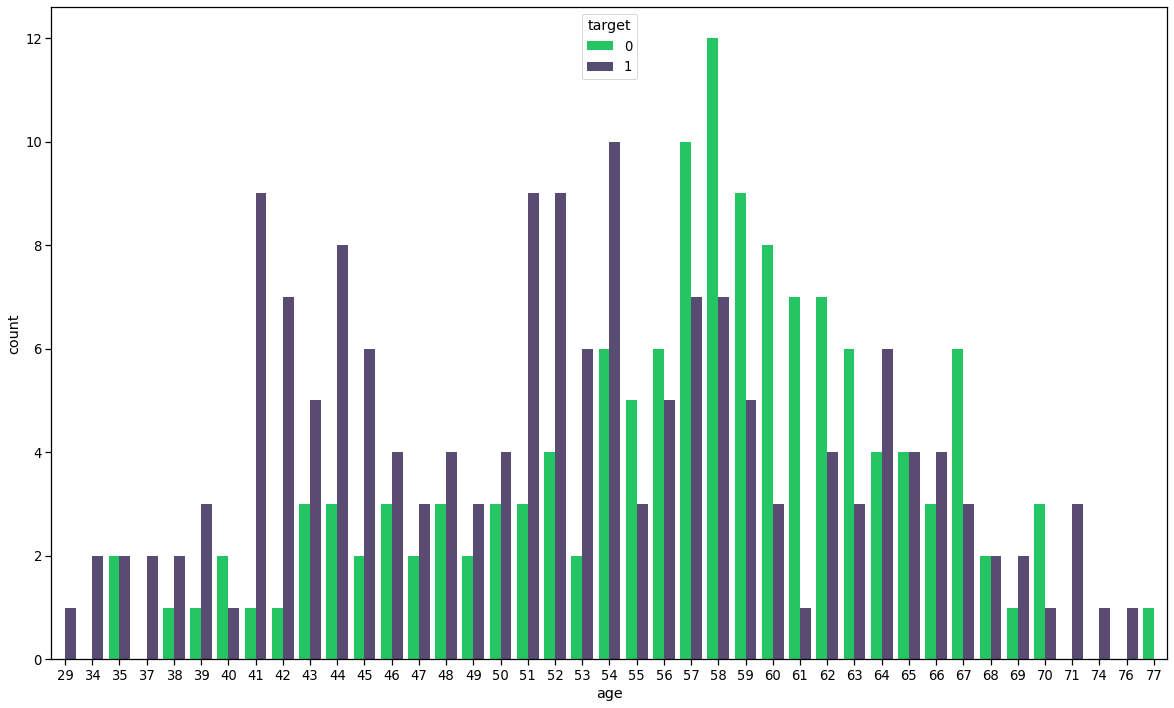

In [14]:
#Evauating age distribution
plt.figure(figsize=(20,12))
sns.countplot(x=df['age'],data=df, hue ="target",palette= cols)
plt.show()

- `Age Distribution` people ranges `41-54` has experienced  more heart disease, as age increases people survived


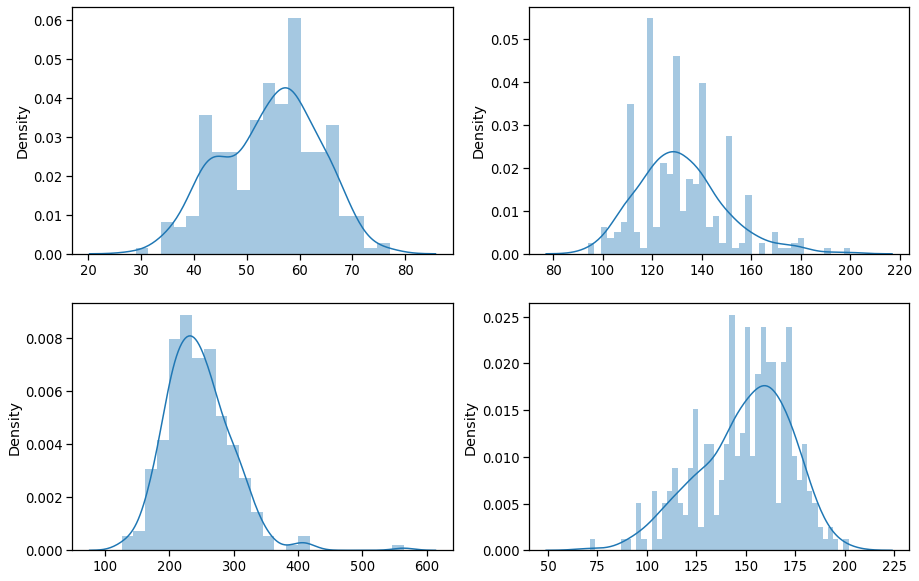

In [15]:
##distribution of numerical variable
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(x=df['age'],bins=20,label=['AGE'],ax=axarr[0][0],kde=True)
sns.distplot(x=df['trestbps'],bins=40,label=['trestbps'],ax=axarr[0][1],kde=True) 
sns.distplot(x=df['chol'],label=['chol'],ax=axarr[1][0],kde=True)
sns.distplot(x=df['thalach'],bins=50,label=['thalach'],ax=axarr[1][1])
plt.show()

In [16]:
#checking skewness of continous variable
print('skewness of thalach:',df.thalach.skew())
print('skewness of chol:',df.chol.skew())
print('skewness of trestbps :',df.trestbps.skew())
print('skewness of ages:',df.age.skew())

skewness of thalach: -0.5374096526832253
skewness of chol: 1.1434008206693387
skewness of trestbps : 0.7137684379181465
skewness of ages: -0.2024633654856539


- Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

In [17]:
#checking kurtosis of cotinous variable
print('kurtosis of thalach:',df.thalach.kurtosis())
print('kurtosis of chol:',df.chol.kurtosis())
print('kurtosis of trestbps :',df.trestbps.kurtosis())
print('kurtosis of ages:',df.age.kurtosis())

kurtosis of thalach: -0.06196993057611566
kurtosis of chol: 4.505423167753712
kurtosis of trestbps : 0.9290540528369715
kurtosis of ages: -0.5421671409908408


- if a dataset has a `positive kurtosis`, it has more in the tails than the normal distribution. If a dataset has a `negative` kurtosis, it has less in the tails than the normal distribution, so let us do standard scaler before traing the model and one more region for standard scaler is different measuring units

# 🖥️ Model Building

In [18]:
 #assigning values to features as X and target as y
x=df.drop(["target"],axis=1)
y=df["target"]

#### Standard scaling

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [19]:
from sklearn.preprocessing import StandardScaler
#standard scaling of dependent columns
col_names = list(x.columns)
s_scaler =StandardScaler()
x_df= s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df, columns=col_names)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.319077e-17,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,-5.562565e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-3.664102e-19,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,2.652810e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-5.203025e-16,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


from the above description table we can observe that standard scalar has changed `mean` almost equal to `zero` and `standard deviation` equal to `one`, and the measuring units to `uniform`.  

In [20]:
#spliting test and training sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train,y_test = train_test_split(x_df,y,test_size=0.3,random_state=7)

In [21]:
print('shape of x_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (212, 13)
shape of x_test: (91, 13)
shape of y_train: (212,)
shape of y_test: (91,)


In [22]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB  

Accuracy score is:  0.7802
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

Confusion Matrix: 
 [[30 15]
 [ 5 41]]


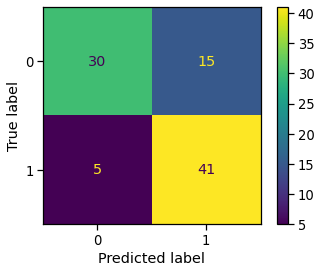

In [36]:
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(x_train, y_train)
pred1 = log_reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print('Accuracy score is: ',round(accuracy_score(y_test,pred1),4))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred1))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred1))
print("============================================")
cm = confusion_matrix(y_test, pred1, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

Random Forest model accuracy score: 0.7473
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.62      0.71        45
           1       0.70      0.87      0.78        46

    accuracy                           0.75        91
   macro avg       0.76      0.75      0.74        91
weighted avg       0.76      0.75      0.74        91

Confusion Matrix: 
 [[28 17]
 [ 6 40]]


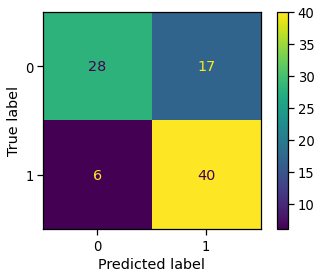

In [37]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred2=rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred2, y_test)
print('Random Forest model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred2)))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred2))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred2))
print("============================================")
cm = confusion_matrix(y_test, pred2, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

KNN model accuracy score: 0.7802
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

Confusion Matrix: 
 [[30 15]
 [ 5 41]]


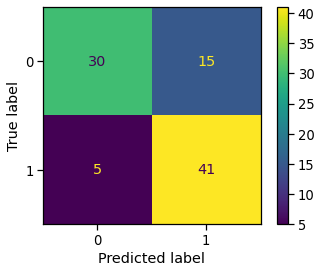

In [38]:
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred3=kn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred3, y_test)
print('KNN model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred3)))
print("============================================")
print('Classification report: \n',classification_report(y_test, pred3))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred3))
print("============================================")
cm = confusion_matrix(y_test, pred3, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

ADB model accuracy score: 0.7802
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        45
           1       0.75      0.85      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Confusion Matrix: 
 [[32 13]
 [ 7 39]]


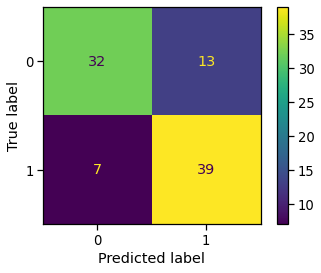

In [41]:
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred4=ad.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred4, y_test)
print('ADB model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred4)))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred4))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred4))
print("============================================")
cm = confusion_matrix(y_test, pred4, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

model accuracy score: 0.7143
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        45
           1       0.67      0.85      0.75        46

    accuracy                           0.71        91
   macro avg       0.73      0.71      0.71        91
weighted avg       0.73      0.71      0.71        91

Confusion Matrix: 
 [[26 19]
 [ 7 39]]


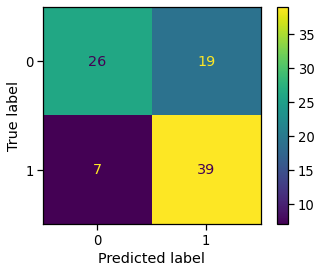

In [42]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred5=dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred5, y_test)
print('model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred5)))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred5))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred5))
print("============================================")
cm = confusion_matrix(y_test, pred5, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

LightGBM Model accuracy score: 0.7363
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.62      0.70        45
           1       0.70      0.85      0.76        46

    accuracy                           0.74        91
   macro avg       0.75      0.74      0.73        91
weighted avg       0.75      0.74      0.73        91

Confusion Matrix: 
 [[28 17]
 [ 7 39]]


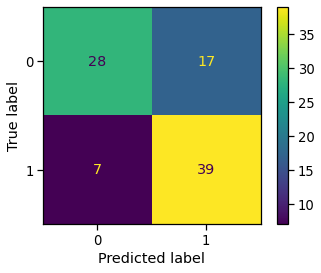

In [43]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)
pred6=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred6, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred6)))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred6))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred6))
print("============================================")
cm = confusion_matrix(y_test, pred6, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

LightGBM Model accuracy score: 0.7143
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        45
           1       0.69      0.80      0.74        46

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91

Confusion Matrix: 
 [[28 17]
 [ 9 37]]


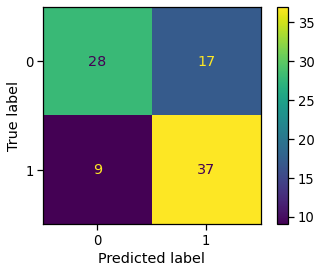

In [44]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
pred7=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred7, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred7)))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred7))
print("============================================")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred7))
print("============================================")
cm = confusion_matrix(y_test, pred7, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

In [56]:
scores=pd.DataFrame({'Logistic_Regression':round(accuracy_score(y_test,pred1),4),'Random-Forest':round(accuracy_score(y_test,pred2),3),'KNN':round(accuracy_score(pred3, y_test),3),'ADA-Boost Classifier':round(accuracy_score(y_test,pred4),3),'DT-Classifier':round(accuracy_score(y_test,pred5),3),'LGB':round(accuracy_score(y_test,pred6),3),'XG-Boost':round(accuracy_score(y_test,pred7),3)}, index=['Scores']).transpose().sort_values(by='Scores',ascending=False,axis=0)
scores

,Scores
Logistic_Regression,0.7802
KNN,0.7800
ADA-Boost Classifier,0.7800
Random-Forest,0.7470
XG-Boost,0.7470
LGB,0.7360
DT-Classifier,0.7140


## Converting to pickle file

In [55]:
import pickle
pickle.dump(kn, open('model2.pkl','wb'))